[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [4]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [9]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요.

# !pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pylab as plt

In [12]:
# os 별로 폰트를 다르게 설정해 줍니다.
import os
if os.name == 'posix':
    sns.set(font = "AppleGothic")
elif os.name == 'nt':
    sns.set(font = "Malgun Gothic")

In [13]:


# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [ ]:
# %ls data

In [7]:
from glob import glob

# glob("data/*.csv")

In [17]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221201103047.csv",                      encoding="cp949")
df_raw.shape

(450, 27)

In [19]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

국가(대륙)별
합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: count, dtype: int64

In [20]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,42331,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32862,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,802,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,802,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2631,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2602,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,123,125,175,251,172,269,88,156,118,338


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [24]:
df = df_raw.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],var_name='기간',value_name= '백만원')
df.shape

(10800, 5)

In [25]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 5. 데이터 전처리
### 기간에서 연도를 분리하기

In [30]:
int("2019 4/4 p)".split()[0])

2019

In [33]:
df['기간']

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
10795    2019.4/4
10796    2019.4/4
10797    2019.4/4
10798    2019.4/4
10799    2019.4/4
Name: 기간, Length: 10800, dtype: object

In [39]:
df['연도'] = df['기간'].map(lambda x: int(x.split('.')[0]))

In [40]:
df["연도"]

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10795    2019
10796    2019
10797    2019
10798    2019
10799    2019
Name: 연도, Length: 10800, dtype: int64

In [45]:
df['분기'] = df['기간'].map(lambda x: int(x.split('.')[1].split('/')[0]))
df["분기"]

0        1
1        1
2        1
3        1
4        1
        ..
10795    4
10796    4
10797    4
10798    4
10799    4
Name: 분기, Length: 10800, dtype: int64

In [51]:

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [59]:
df['백만원'] = df["백만원"].replace("-",np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


###5.3 필요없는 데이터 제거하기

In [60]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"
# df["판매유형별"] != "계"
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019.4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019.4/4,531.0,2019,4
10797,기타,기 타,계,2019.4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019.4/4,1.0,2019,4


In [69]:
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] !='합계')].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [71]:
#결측치보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

##6. K-Beauty 시각화
### 전체 상품군 판매액

In [75]:
df_total = df[df['판매유형별'] =='계'].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019.4/4,193.0,2019,4
10788,기타,음·식료품,계,2019.4/4,319.0,2019,4
10791,기타,농축수산물,계,2019.4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019.4/4,531.0,2019,4


<Axes: xlabel='연도', ylabel='백만원'>

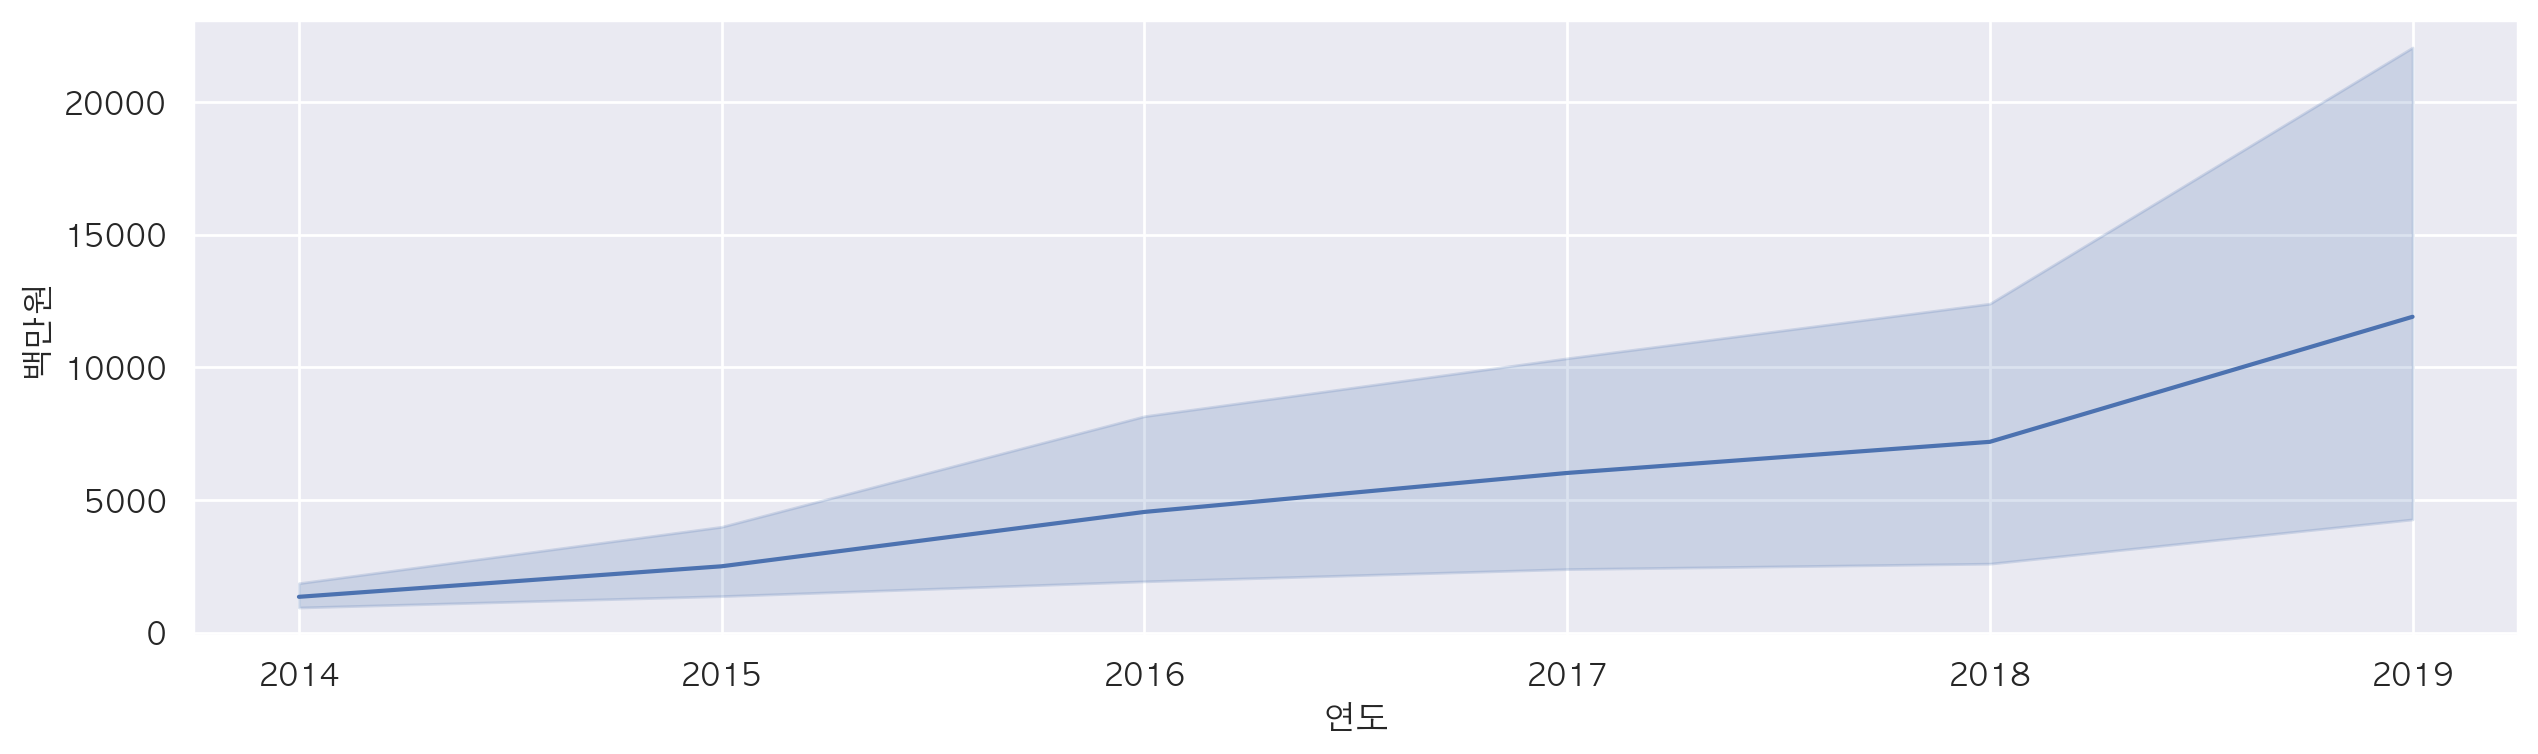

In [76]:
plt.figure(figsize=(15, 4))
sns.lineplot(df_total, x='연도',y='백만원')

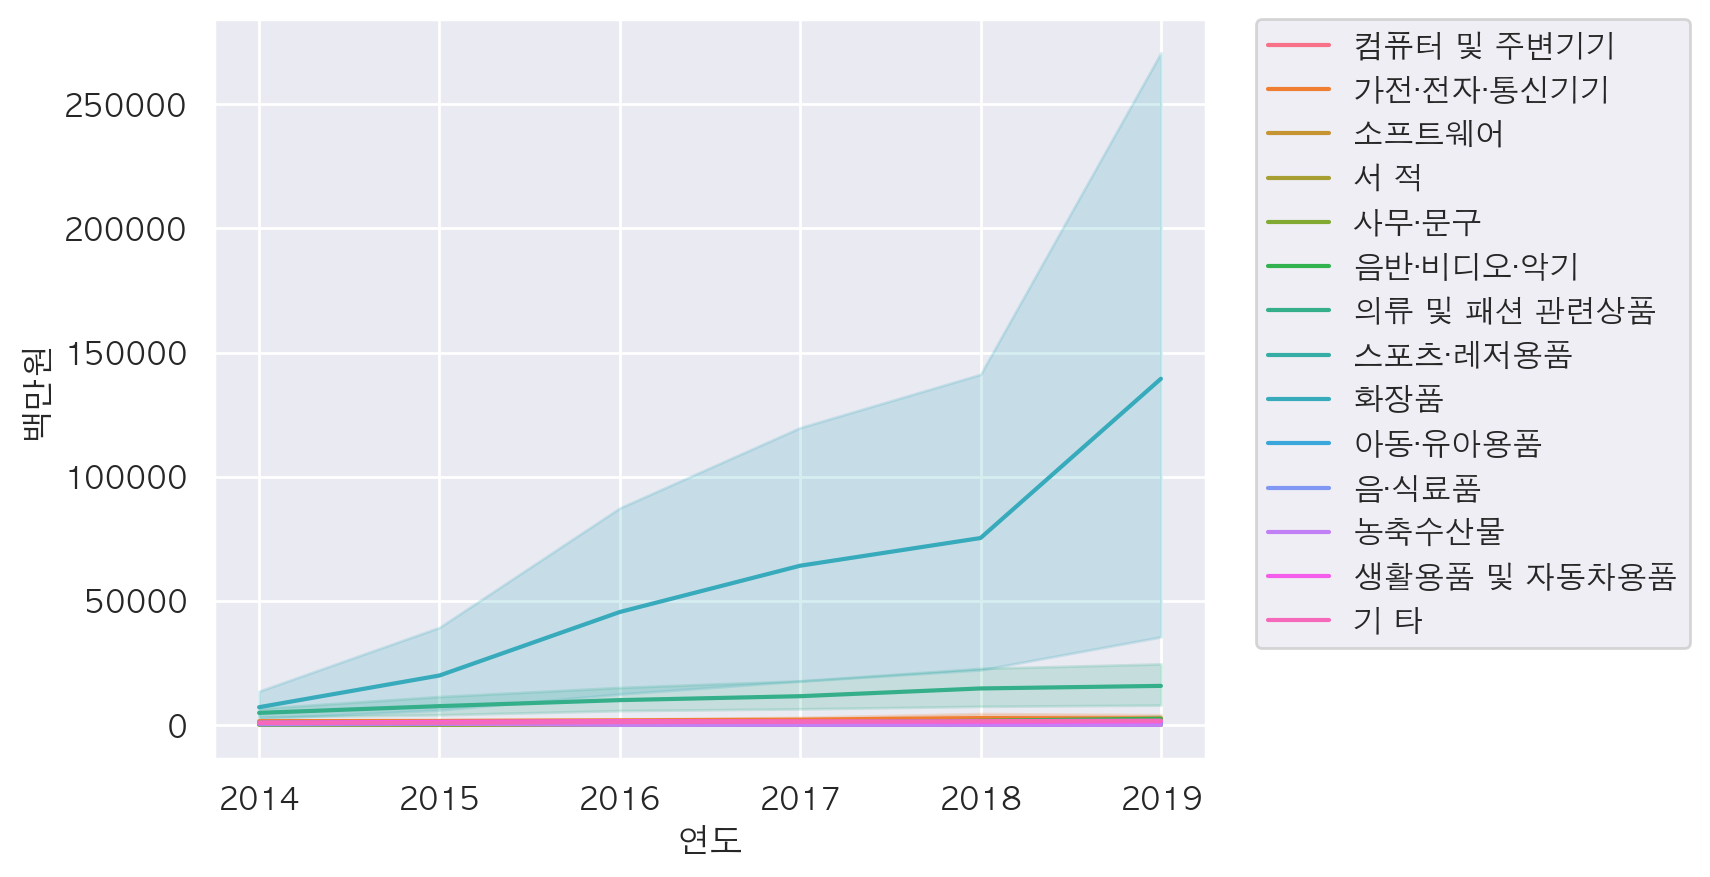

In [80]:
sns.lineplot(df_total, x='연도',y='백만원',hue='상품군별')
plt.legend(bbox_to_anchor = (1.05,1),loc = 2, borderaxespad = 0.)


/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


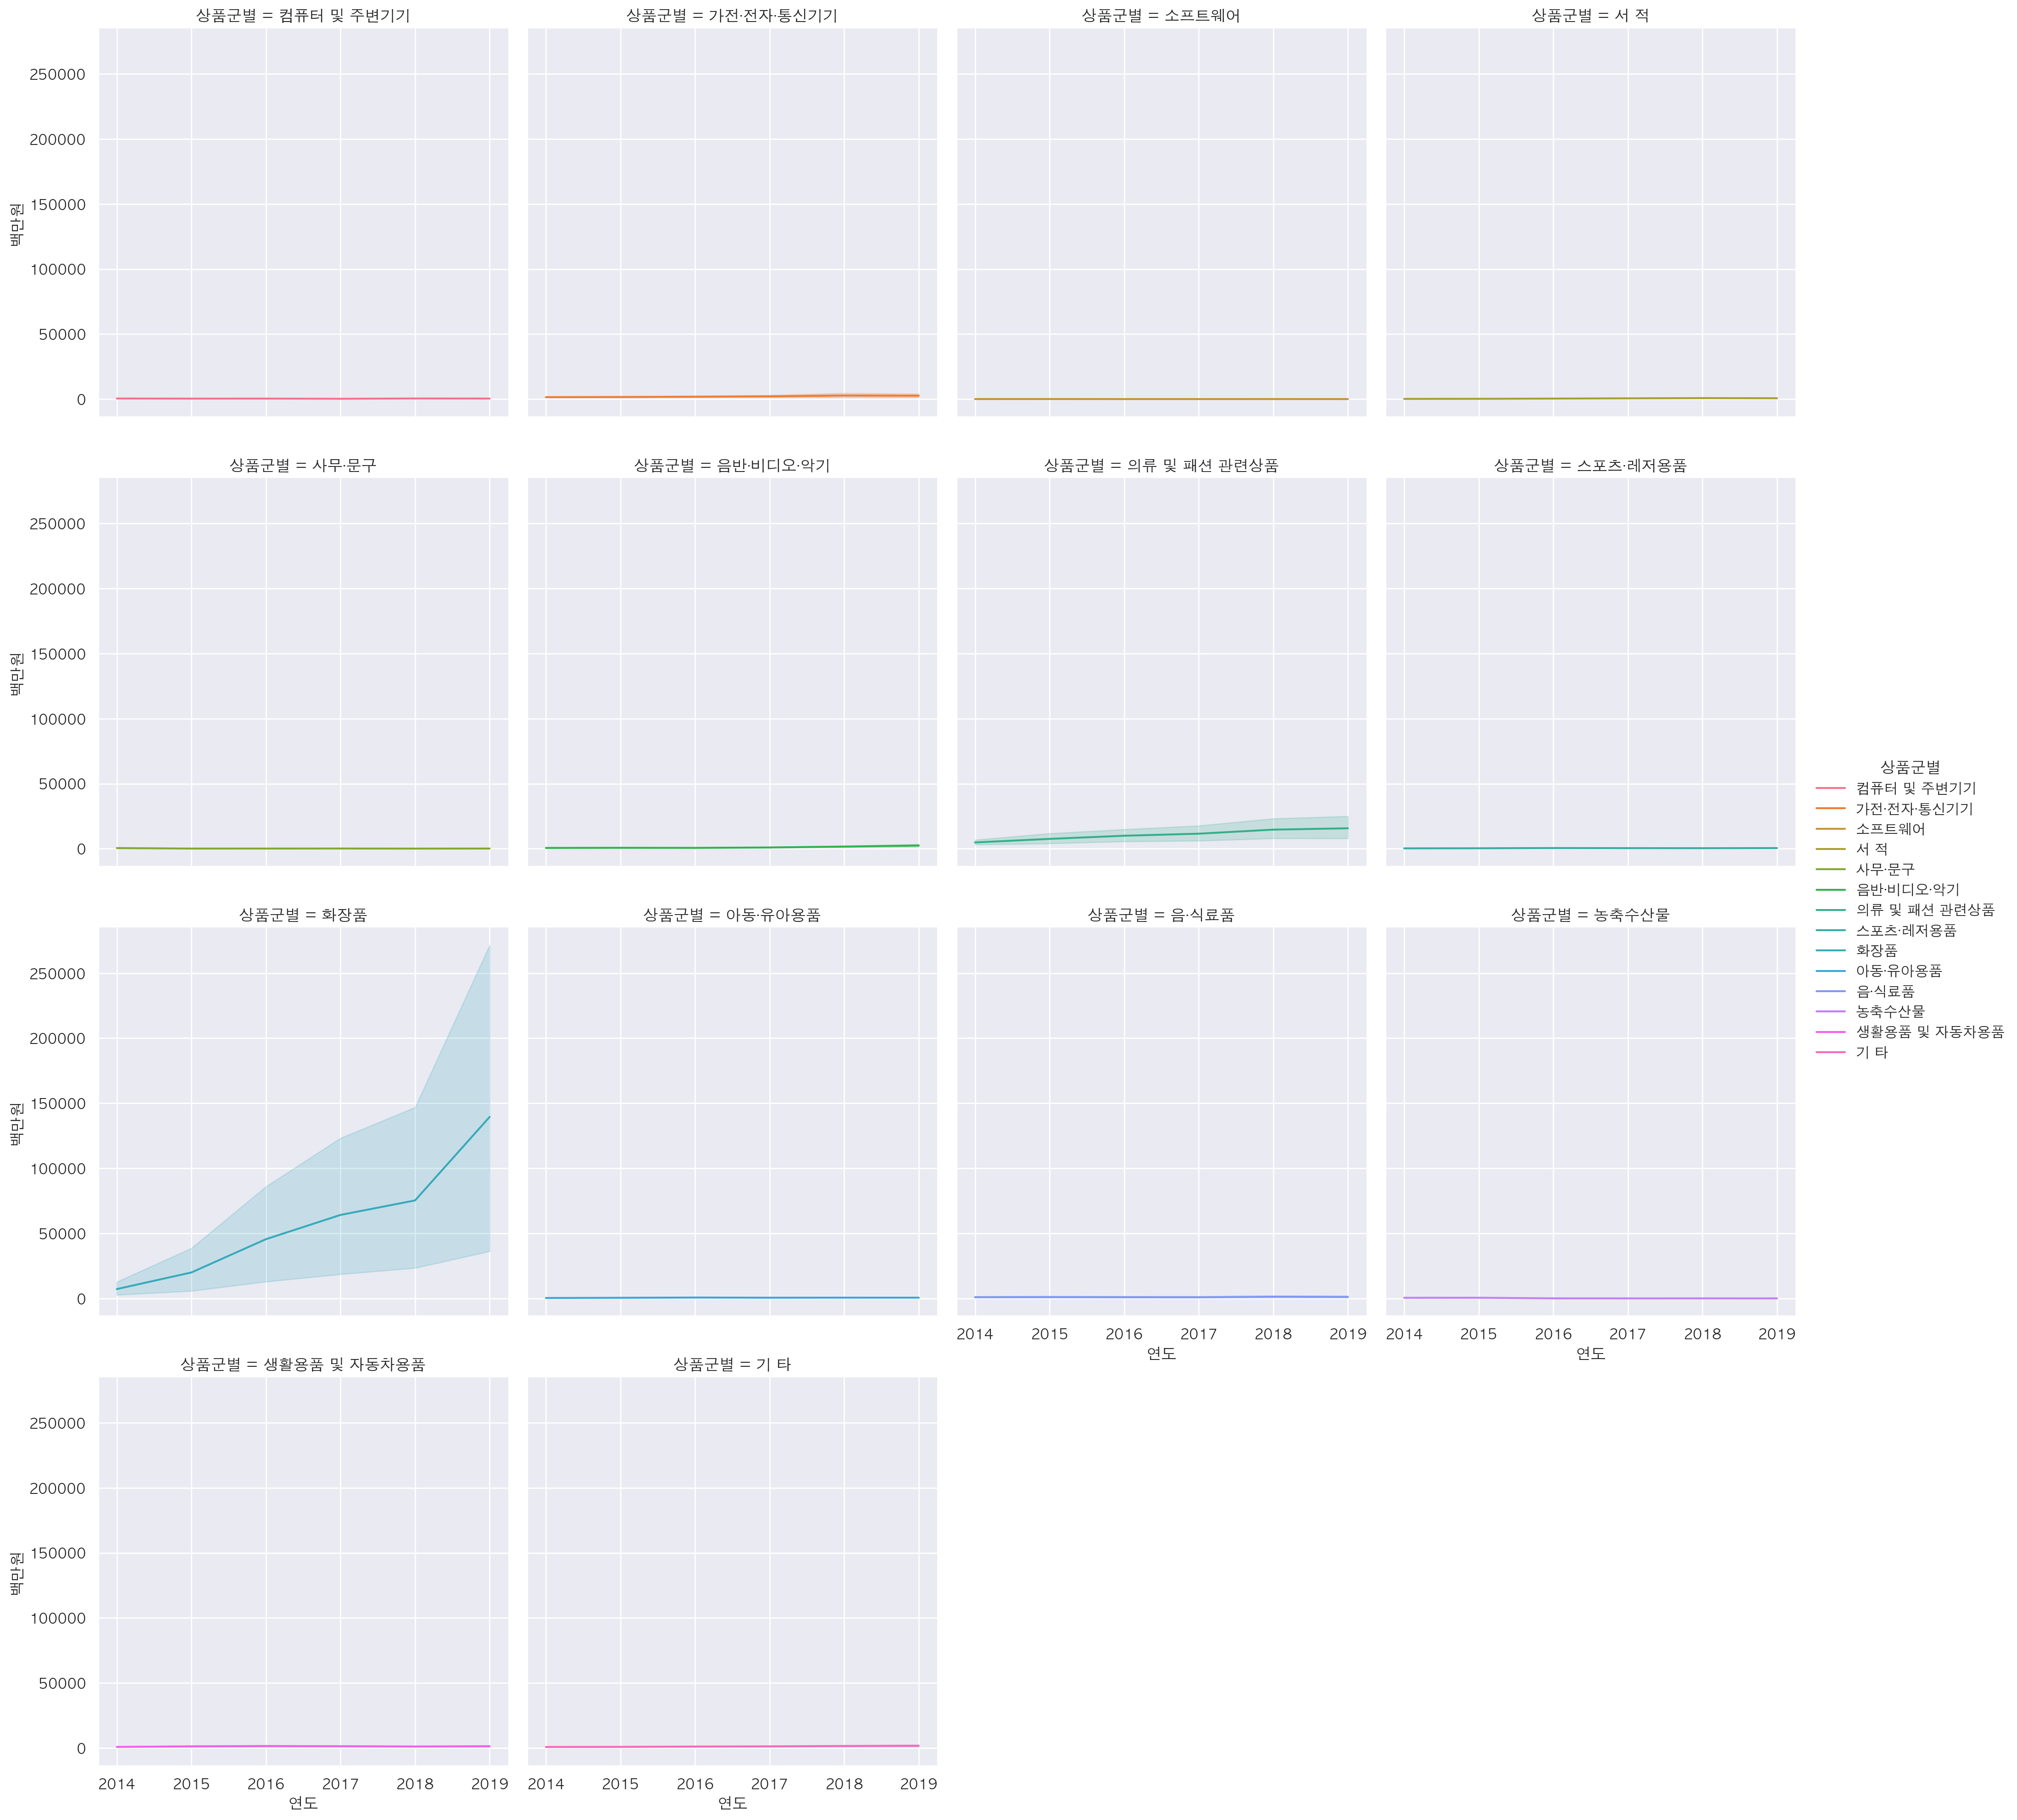

In [85]:
# df_sub


/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


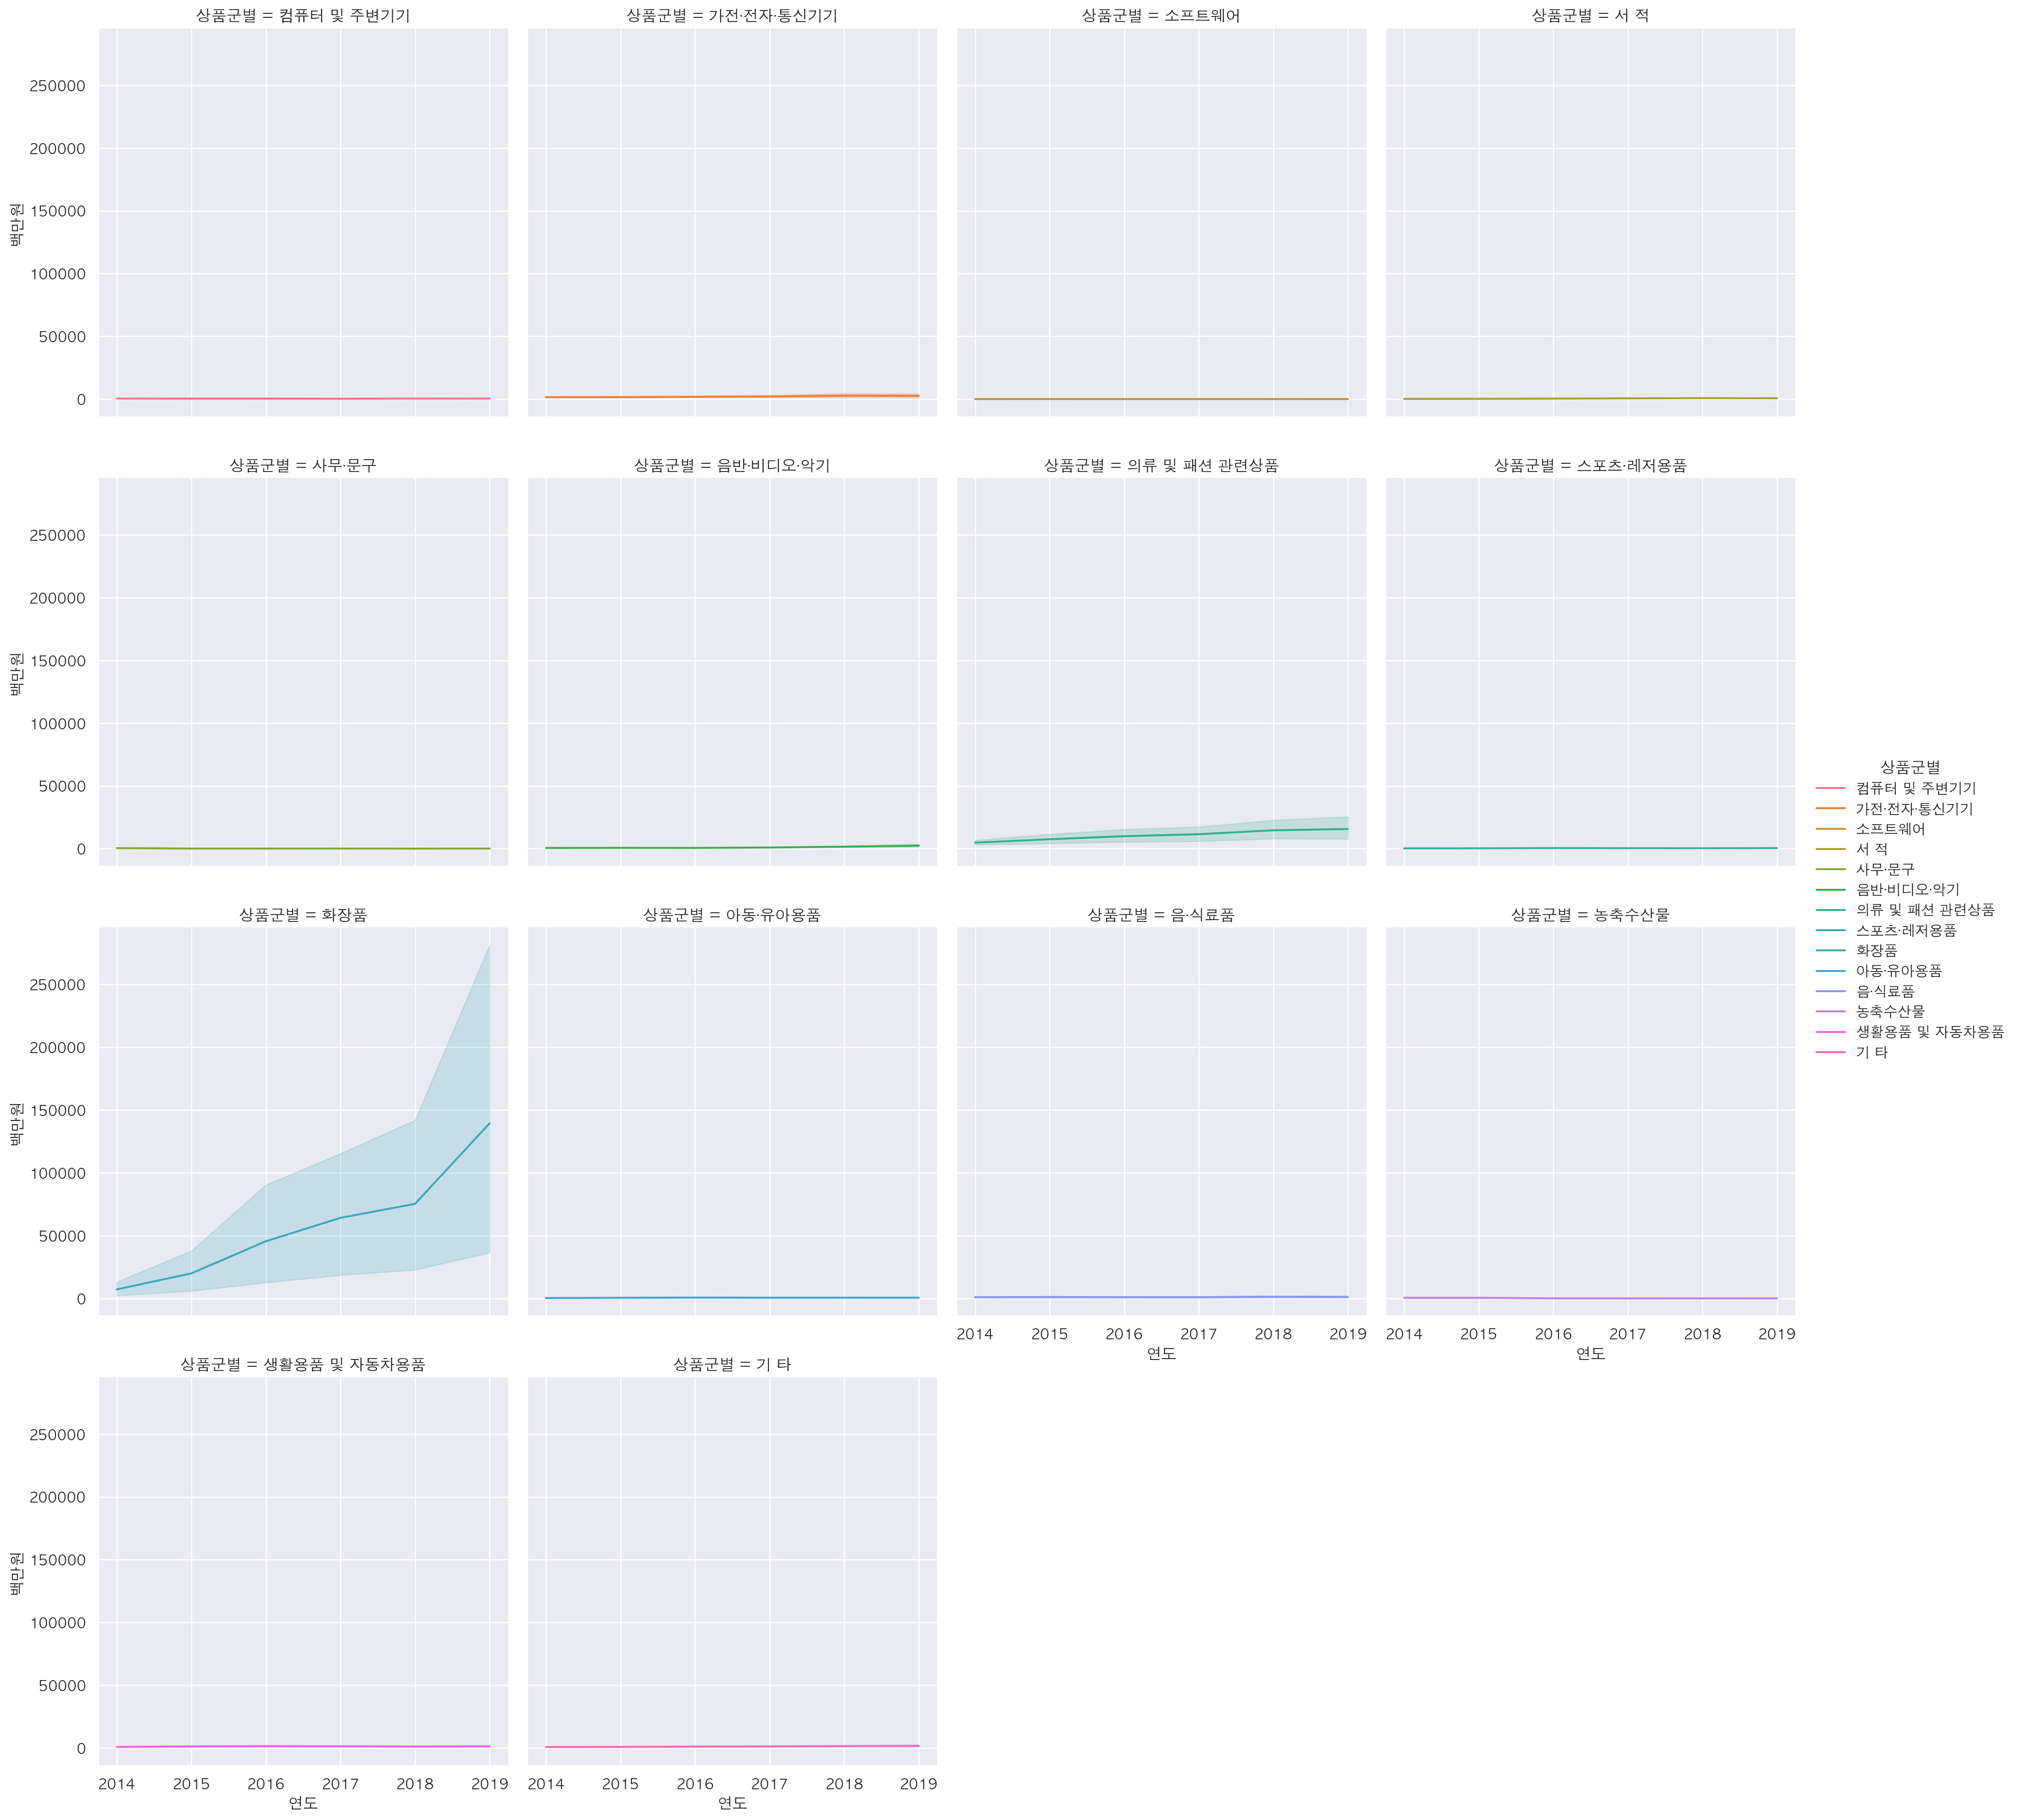

In [86]:
# sns.relplot
sns.relplot(data=df_total, x='연도', y='백만원',hue='상품군별',kind='line',col='상품군별', col_wrap = 4)

### 화장품의 온라인쇼핑 해외직접판매액

In [97]:
# df_cosmetic
#isin을 사용해 화장품만 제외하고 df_sub라는 변수에 담습니다.
df_sub=df_total[~df_total['상품군별'].isin(['화장품','의류 및 패션 관련상품'])]

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


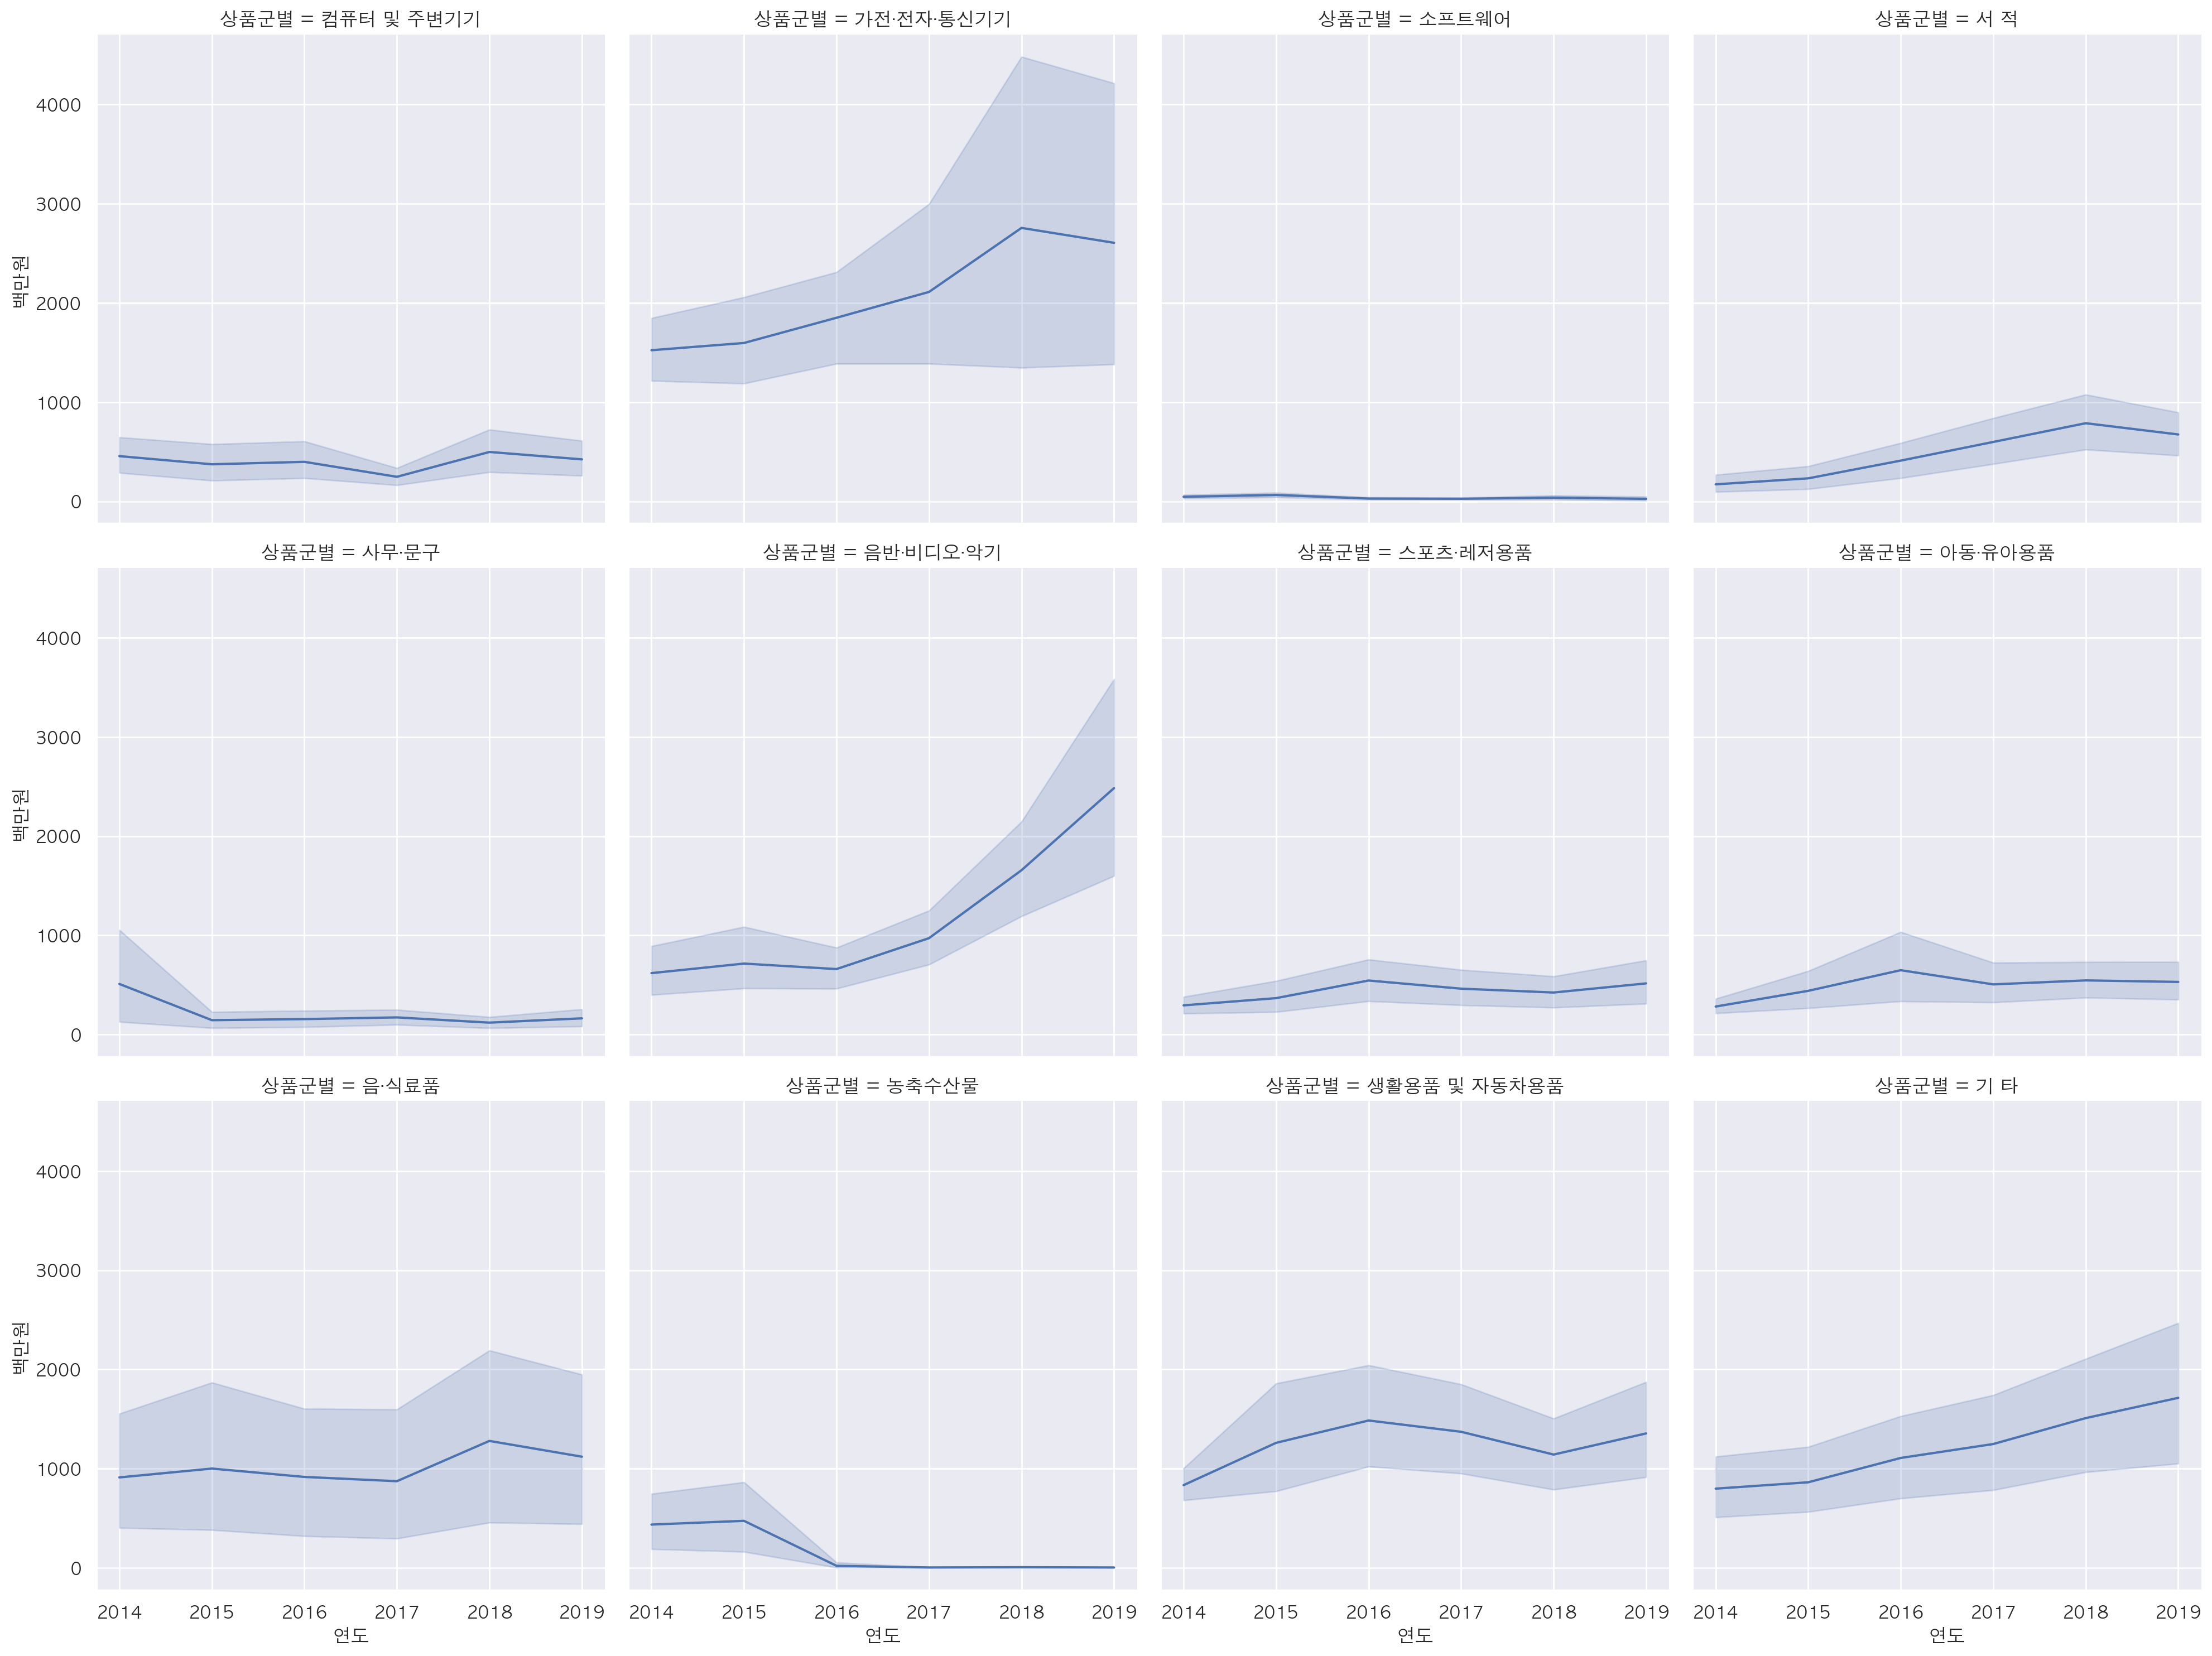

In [98]:
sns.relplot(df_sub,x='연도', y='백만원', kind='line', col='상품군별',col_wrap=4)

### 화장품의 온라인쇼핑 해외직접판매액


In [105]:
df_cosmetic = df_total[df_total['상품군별']=='화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

<Axes: xlabel='연도', ylabel='백만원'>

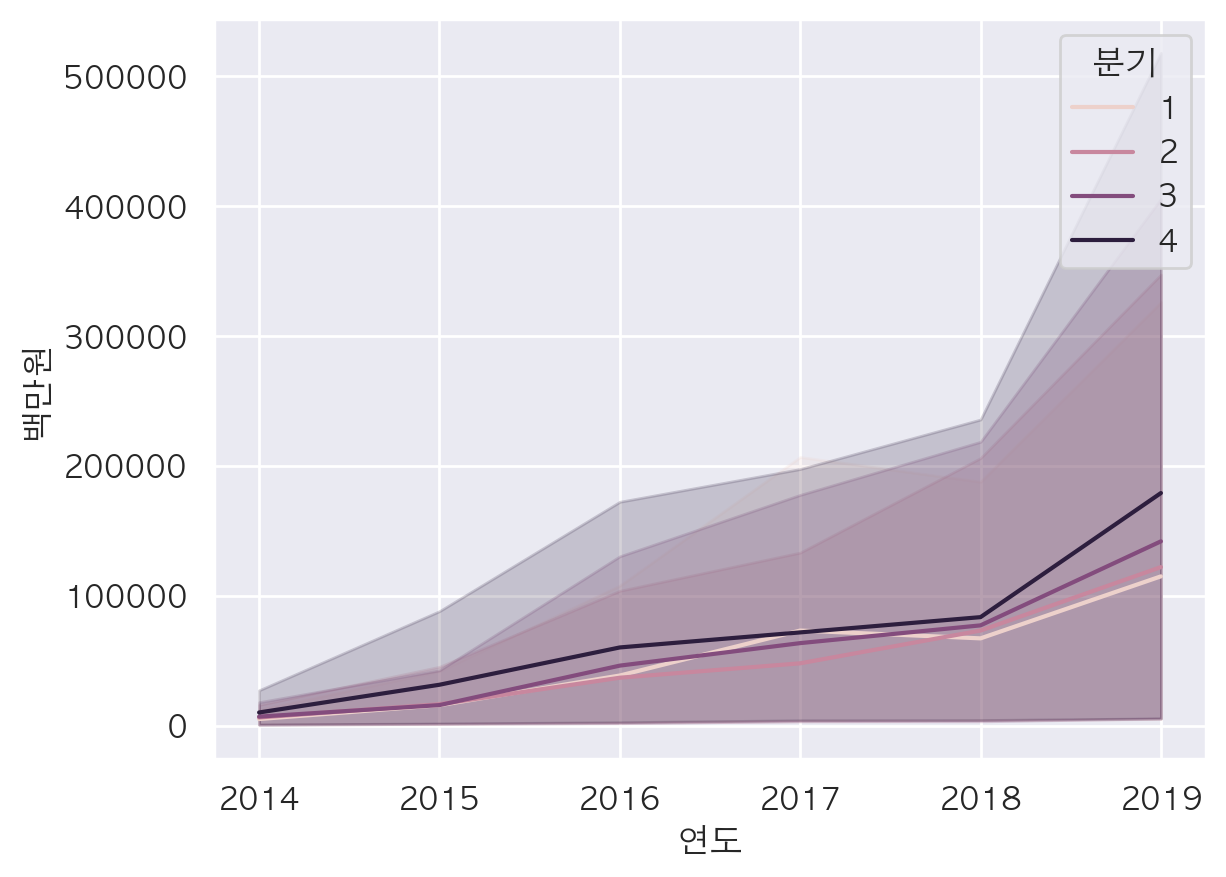

In [106]:
sns.lineplot(data=df_cosmetic,x='연도',y='백만원',hue='분기')

<Axes: xlabel='기간', ylabel='백만원'>

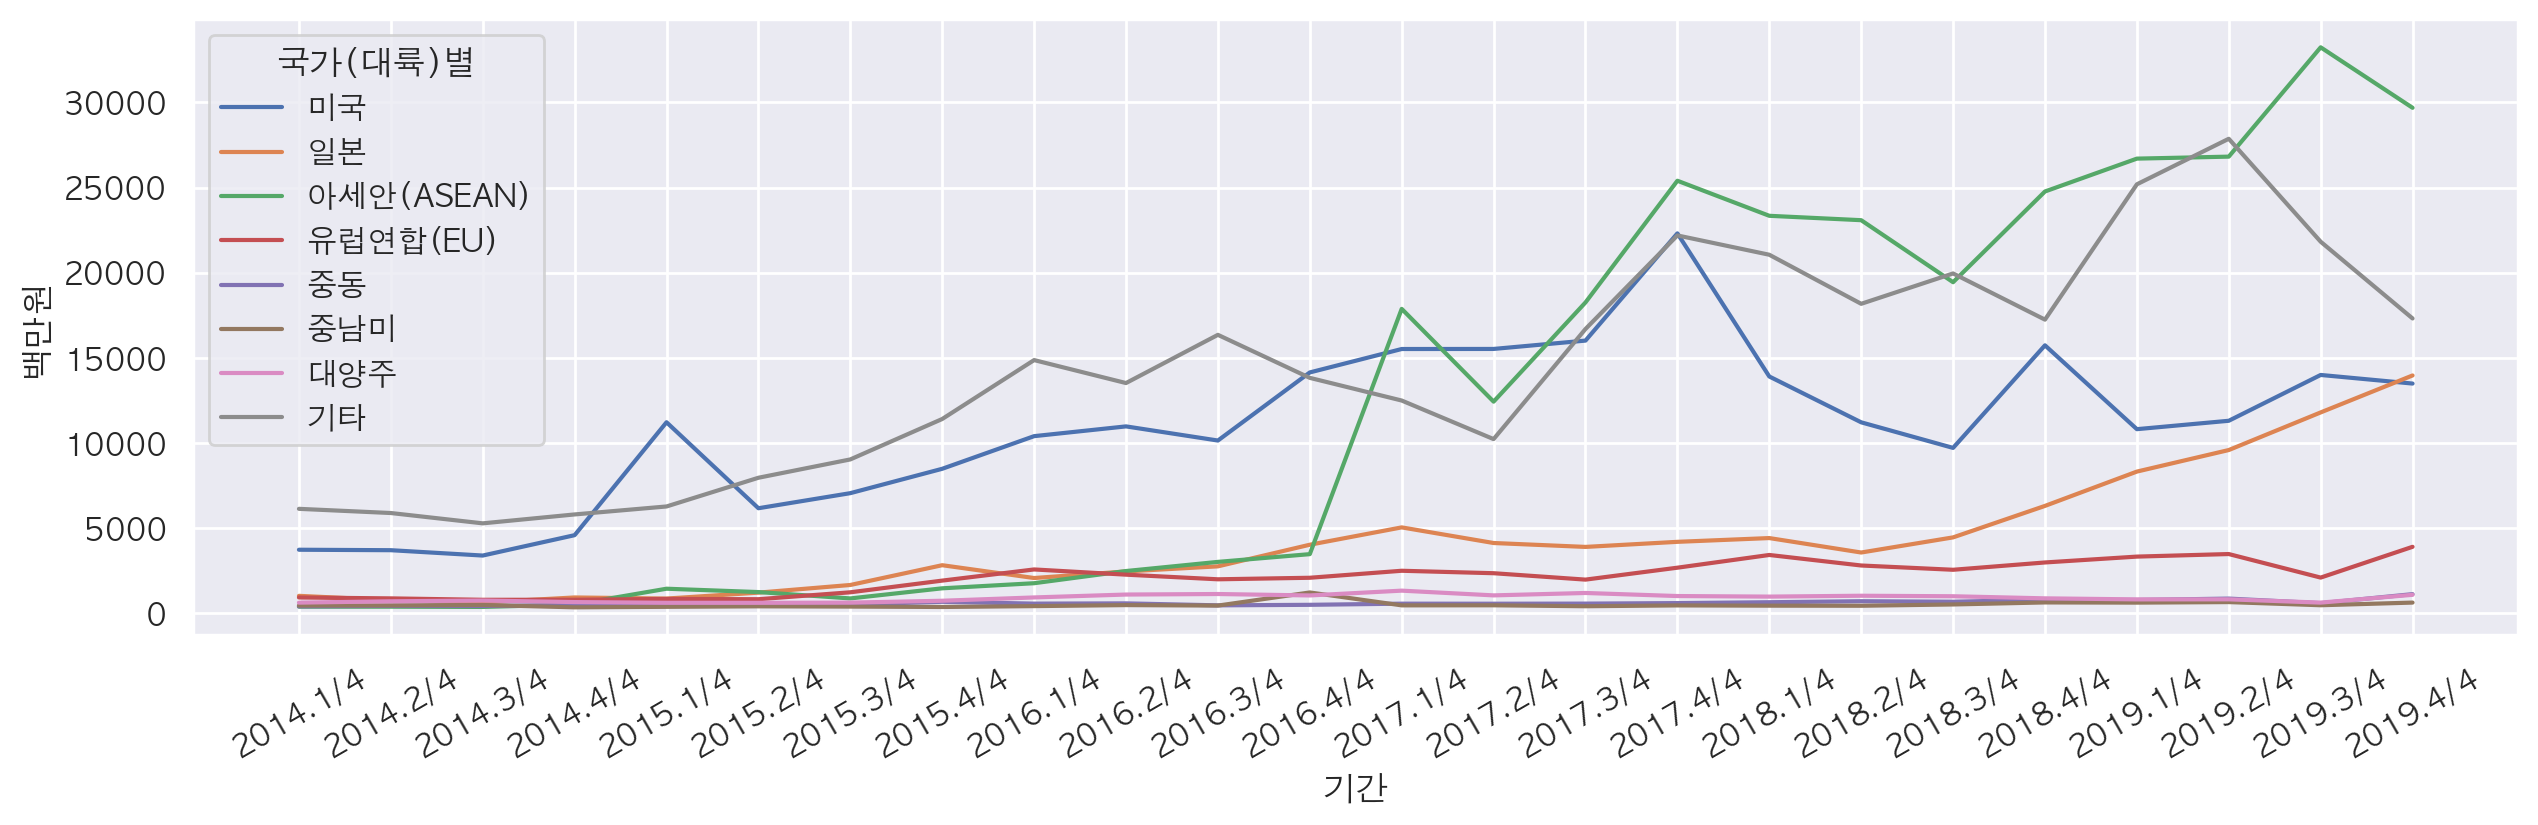

In [111]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'],x='기간', y='백만원',hue='국가(대륙)별')

# 중국이 너무 커서 제외해봄

/var/folders/b4/sv3y8crx3jx6kn5k220bs8bh0000gn/T/ipykernel_17813/3586628392.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sub,x='기간',y='백만원',hue='판매유형별',ci=None)


<Axes: xlabel='기간', ylabel='백만원'>

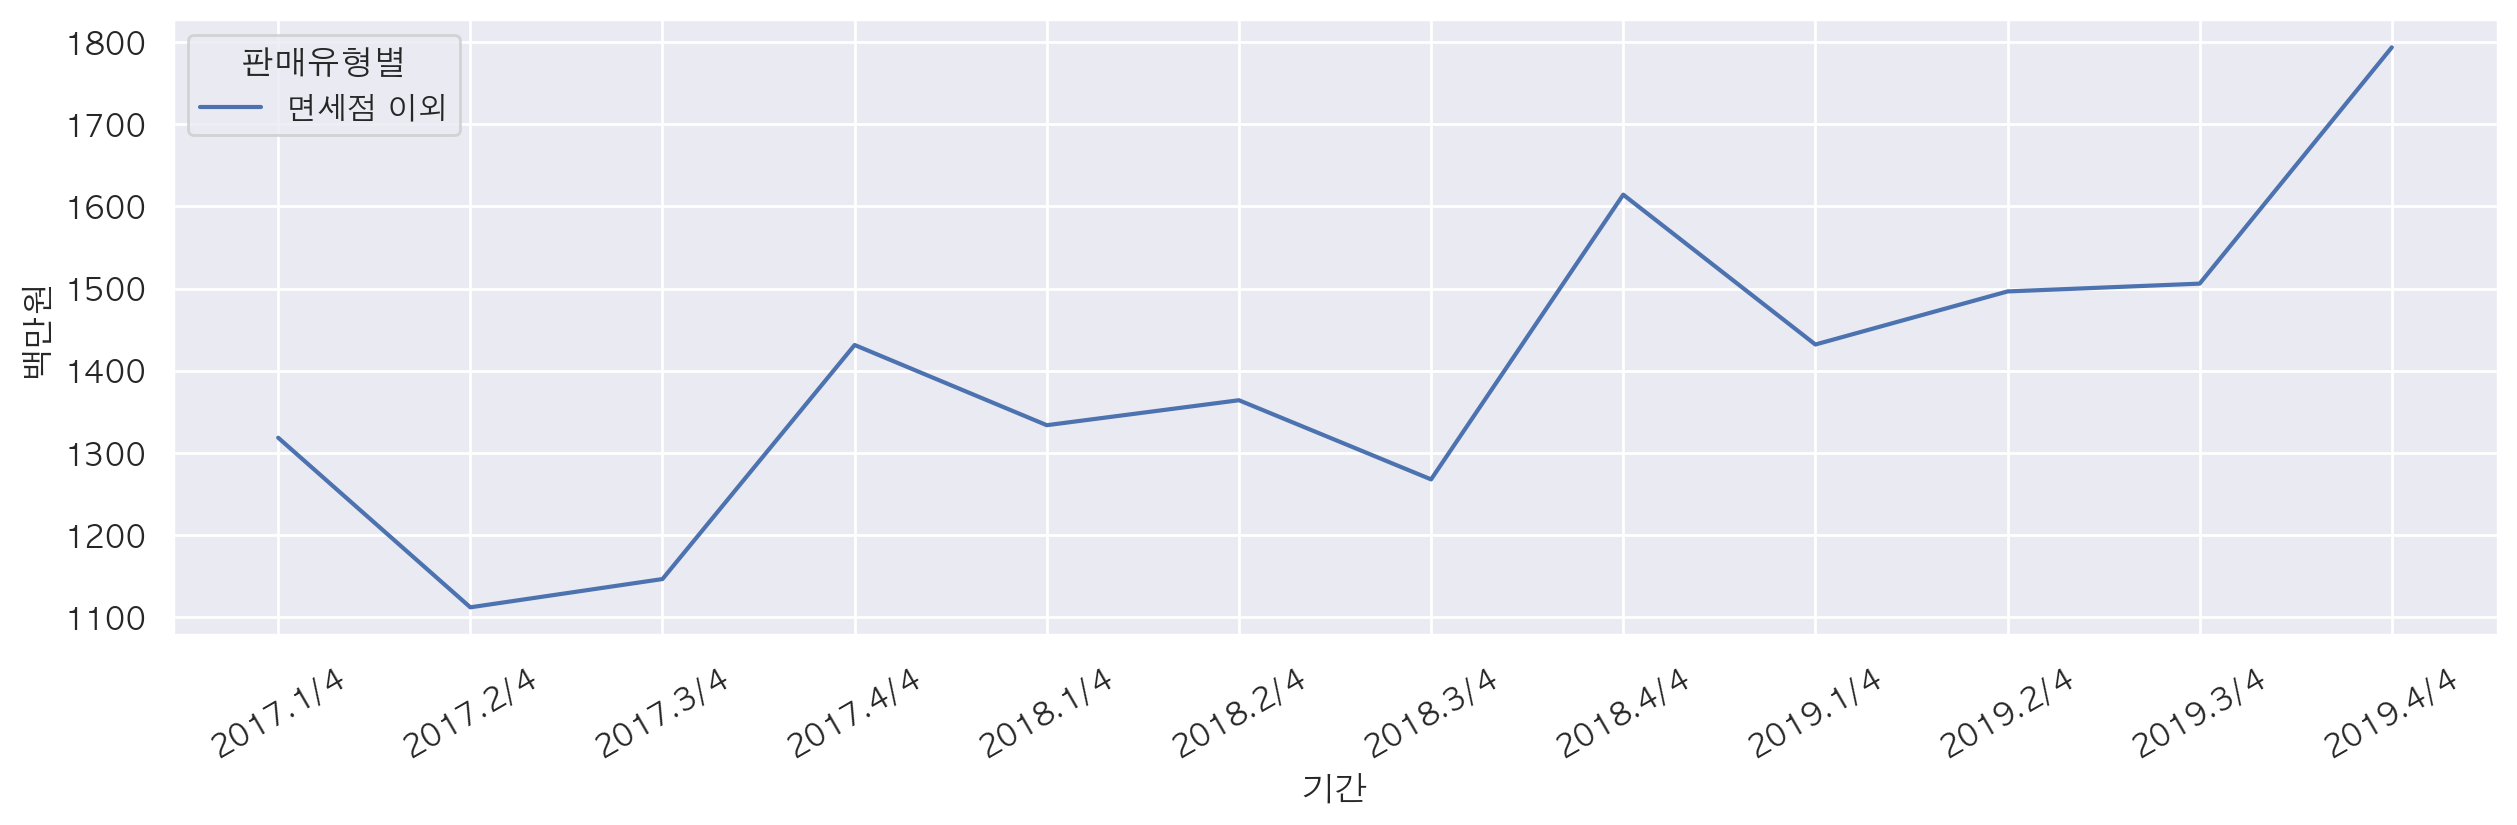

In [132]:
#판매유형별
plt.figure(figsize =(15,4))
plt.xticks(rotation = 30)
df_sub =df[(df['판매유형별'] !='계')&(df['판매유형별'] !='면세점')].copy()
sns.lineplot(data=df_sub,x='기간',y='백만원',hue='판매유형별',ci=None)

### 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [137]:
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품')&(df['판매유형별'] == '계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

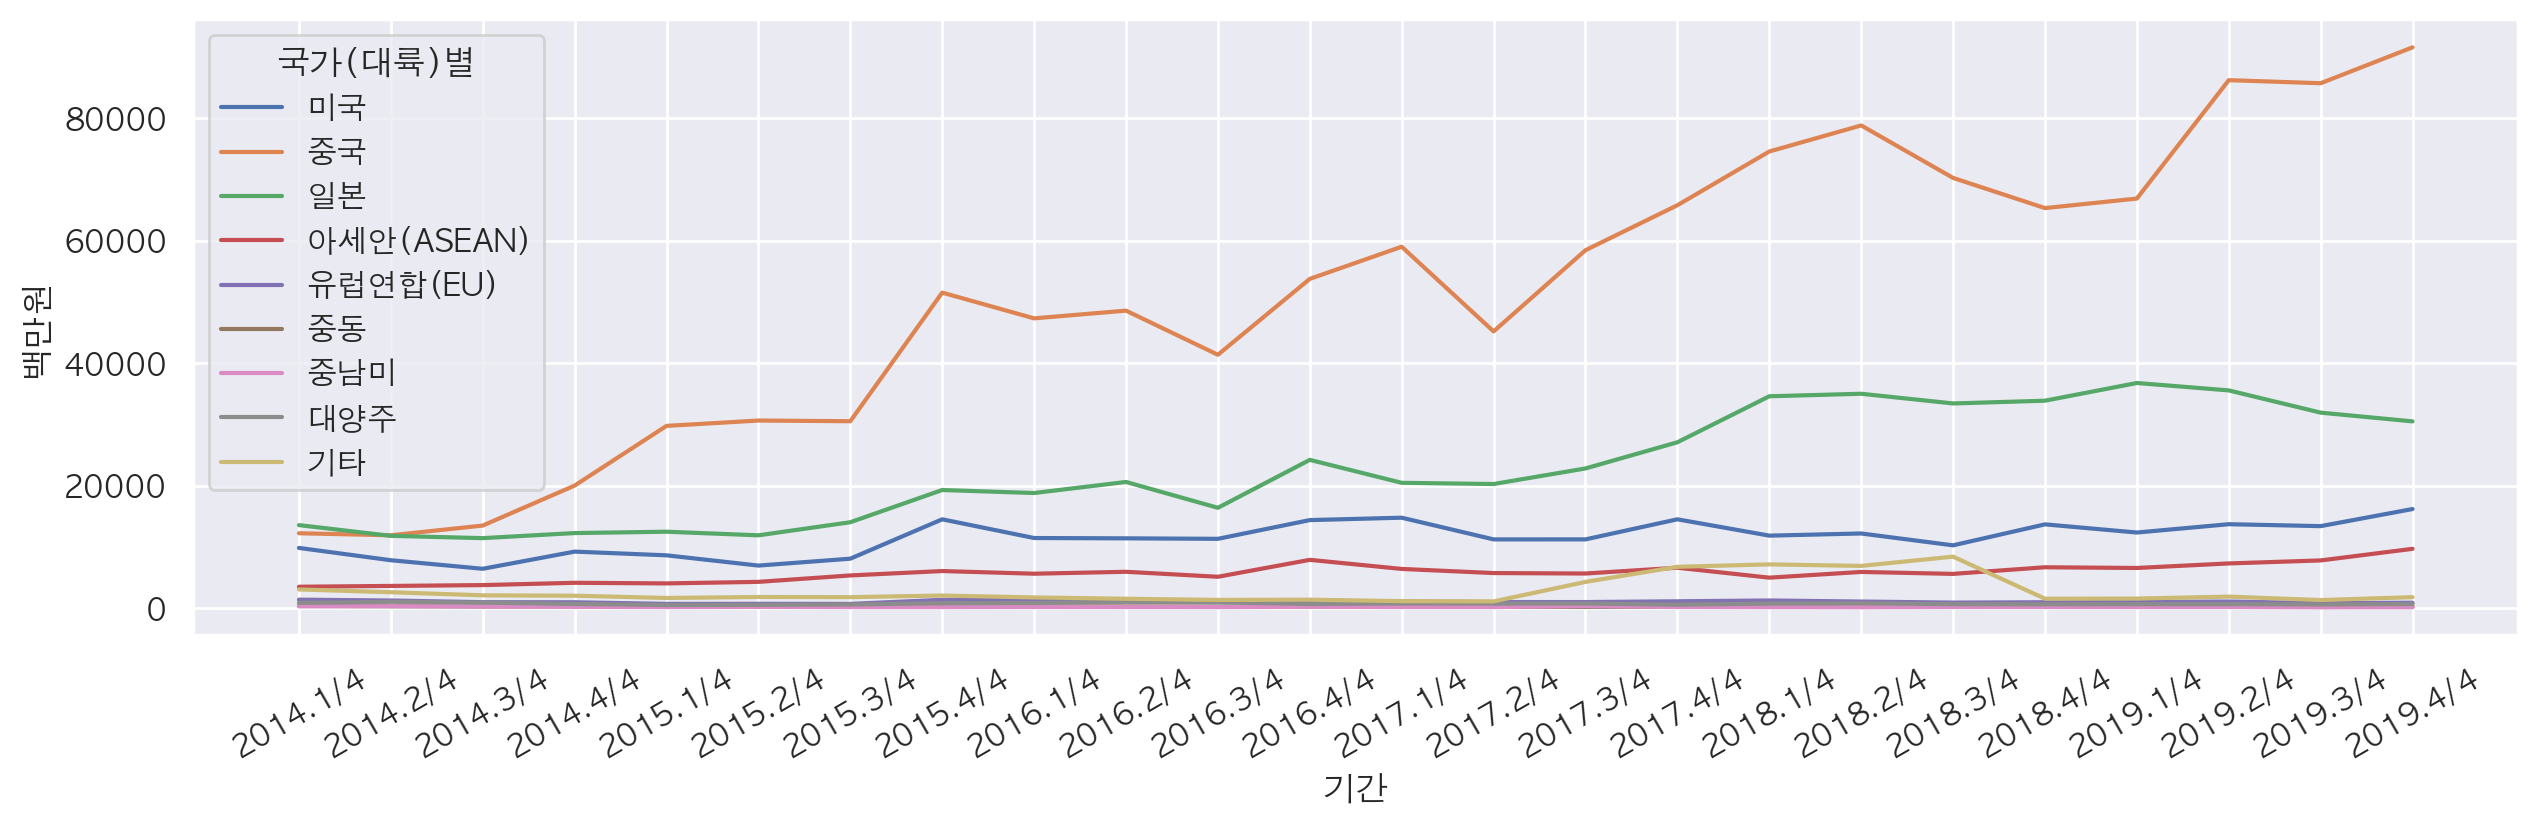

In [140]:
# df_fashion
plt.figure(figsize=(15,4))
plt.xticks(rotation =30)
sns.lineplot(data = df_fashion, x='기간', y='백만원',hue='국가(대륙)별')

### 6.4 데이터 집계하기

### 연산결과를 시각적으로 보기

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [ ]:
plt.figure(figsize=(15, 4))


* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

In [ ]:
plt.figure(figsize=(15, 4))
